## Fashion MNIST adatset DT klasszifikáció 

---



### Adatok feltöltése

In [3]:
from google.colab import files

uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv


### Adatok betöltése

In [0]:
import pandas as pd

df = pd.read_csv('fashion-mnist_train.csv')
test =  pd.read_csv('fashion-mnist_test.csv')

### Adatok előkészítése

In [0]:
from sklearn.preprocessing import label_binarize

y=df['label']
y_bin = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
X=df.drop('label', axis=1)
X=X/255

y_test=test['label']
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
X_test=test.drop('label', axis=1)
X_test=X_test/255

eredeti: 0.8104
1: 0.2756
eredeti: 0.8104
2: 0.5548
eredeti: 0.8104
3: 0.6515
eredeti: 0.8104
4: 0.7096
eredeti: 0.8104
5: 0.7275
eredeti: 0.8104
6: 0.7348
eredeti: 0.8104
7: 0.7463
eredeti: 0.8104
8: 0.7515
eredeti: 0.8104
9: 0.7643
eredeti: 0.8104
10: 0.7664
eredeti: 0.8104
11: 0.7664
eredeti: 0.8104
12: 0.7287
eredeti: 0.8104
13: 0.7297
eredeti: 0.8104
14: 0.7286
eredeti: 0.8104
15: 0.7354
eredeti: 0.8104
20: 0.7145
eredeti: 0.8104
25: 0.7266
eredeti: 0.8104
30: 0.7276
eredeti: 0.8104
40: 0.7267
eredeti: 0.8104
50: 0.7095
eredeti: 0.8104
60: 0.7077
eredeti: 0.8104
70: 0.7039
eredeti: 0.8104
80: 0.7
eredeti: 0.8104
90: 0.7107
eredeti: 0.8104
100: 0.7079


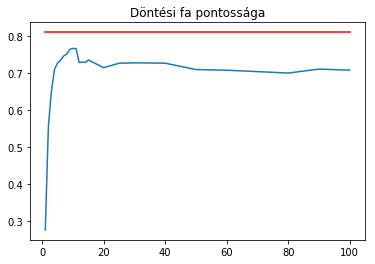

In [7]:
from sklearn.decomposition import TruncatedSVD
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X,y)
pred = clf.predict(X_test)

#Kitérő plothoz
svdsek=[]
eredetin=[]
rangok = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,40,50,60,70,80,90,100]
for i in rangok:
 

  svd = TruncatedSVD(n_components=i, n_iter=7, random_state=42)
  svd.fit(X)
  X_svd=svd.transform(X)

  svd.fit(X_test)
  X_test_svd=svd.transform(X_test)
  
  clf = tree.DecisionTreeClassifier(max_depth=10)
  clf.fit(X_svd,y)
  
  preds = clf.predict(X_test_svd)
  print("eredeti: " + str(accuracy_score(y_test, pred)))
  print(str(i) + ": " + str(accuracy_score(y_test, preds)))
  svdsek.append(accuracy_score(y_test, preds))
  eredetin.append(accuracy_score(y_test, pred))
  

plt.plot(rangok, svdsek)
plt.plot(rangok, eredetin, 'r-')
plt.plot(rangok, rferedeti, 'm-')
plt.plot
plt.title('Döntési fa pontossága')
plt.show()


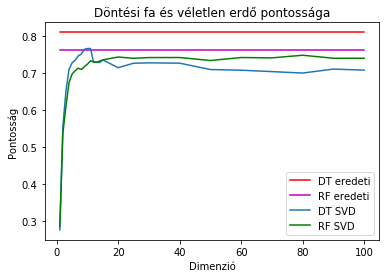

In [18]:
rferedeti =[0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618]
rfsvdsek=[0.2842, 0.5364, 0.6104, 0.6742, 0.6973, 0.7062, 0.7132, 0.7096, 0.717, 0.7241, 0.7331, 0.7304, 0.7295, 0.7322, 0.7358, 0.7433, 0.7399, 0.7419, 0.742, 0.7339, 0.742, 0.7411, 0.7482, 0.74, 0.7401]
plt.plot(rangok, eredetin, 'r-', label='DT eredeti')
plt.plot(rangok, rferedeti, 'm-', label='RF eredeti')
plt.plot(rangok, svdsek, label='DT SVD')
plt.plot(rangok, rfsvdsek, 'g-', label='RF SVD')
plt.title('Döntési fa és véletlen erdő pontossága')
plt.legend()
plt.xlabel('Dimenzió')
plt.ylabel('Pontosság')
plt.show()

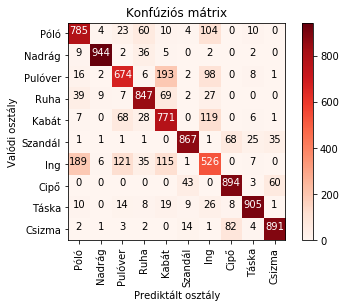

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

classes = {0: 'Póló',1: 'Nadrág',2: 'Pulóver',3: 'Ruha',4: 'Kabát',5: 'Szandál',6: 'Ing',7: 'Cipő',8: 'Táska',9: 'Csizma'}
num_classes         = len(classes)
classes_fashion     = ['Póló','Nadrág','Pulóver','Ruha','Kabát','Szandál','Ing','Cipő','Táska','Csizma']

predictions = pred
cm=confusion_matrix(y_test, predictions)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Konfúziós mátrix')
tick_marks = np.arange(len(classes_fashion))
plt.xticks(tick_marks, classes_fashion, rotation=90)
plt.yticks(tick_marks, classes_fashion)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Valódi osztály')
plt.xlabel('Prediktált osztály')
plt.colorbar()
plt.show()
    

### Dimenzió csökkentés

Szinguláris érték felbontással 784 dimenziós adatokból kiválasztotjuk a 20 főkomponenst.

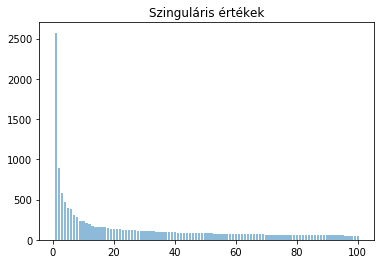

In [0]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

svd100 = TruncatedSVD(n_components = 100, n_iter=7, random_state=42)
svd100.fit(X)

plt.bar(np.arange(1,101,1),svd100.singular_values_, alpha=0.5)
plt.title('Szinguláris értékek')
plt.show()

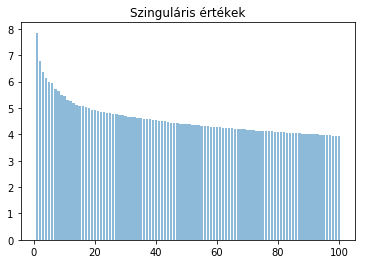

In [0]:
import math

logsingulars = []
for i in svd100.singular_values_:
  logsingulars.append(math.log(i))

plt.bar(np.arange(1,101,1),logsingulars, alpha=0.5)
plt.title('Szinguláris értékek')
plt.show()